In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
splitted_regs_fancy = '/data/bswift-1/Pessoa_Lab/eCON/dataset/preproc2/CON002/splitted_regs_fancy'
regs_fancy = '/data/bswift-1/Pessoa_Lab/eCON/dataset/preproc2/CON002/regs_fancy'

In [3]:
!ls $regs_fancy

CON002_all_regs.txt	       CON002_Cv_motion_HRF.txt
CON002_block_offsets.txt       CON002_MotionAndShockCensor_1.0.txt
CON002_block_onsets.txt        CON002_MotionCensor_1.0.txt
CON002_buttonPress_run1.txt    CON002_MotionParDeriv.txt
CON002_buttonPress_run2.txt    CON002_offset_HRF.txt
CON002_buttonPress_run3.txt    CON002_onset_HRF.txt
CON002_buttonPress_run4.txt    CON002_sblock_HRF.txt
CON002_buttonPress_run5.txt    CON002_shock_anticipation.txt
CON002_buttonPress_run6.txt    CON002_shock_onsets.1D
CON002_censor15.txt	       CON002_shock_onsets_para.1D
CON002_censor.txt	       CON002_shock_onsets_run1.txt
CON002_Cmag_HRF.txt	       CON002_shock_onsets_run2.txt
CON002_Cprox_HRF.txt	       CON002_shock_onsets_run3.txt
CON002_CproxXmag_HRF.txt       CON002_shock_onsets_run4.txt
CON002_CproxXsign_HRF.txt      CON002_shock_onsets_run5.txt
CON002_CproxXsignXmag_HRF.txt  CON002_shock_onsets_run6.txt
CON002_Csign_HRF.txt	       CON002_shock_onsets.txt
CON002_CsignXmag_HRF.txt       regs.pn

In [4]:
proximity = pd.read_csv(regs_fancy+'/CON002_all_regs.txt',sep ='\t')['prox']

<AxesSubplot:>

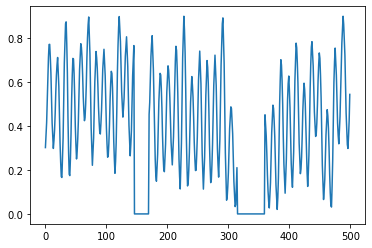

In [5]:
proximity.iloc[:500].plot()

In [6]:
near_miss = pd.Series(np.loadtxt("CON002_near_misses.1D"))
shock = pd.Series(np.loadtxt("CON002_shocks.1D"))

## Visulaization shocks/near-misses with respect to proximity

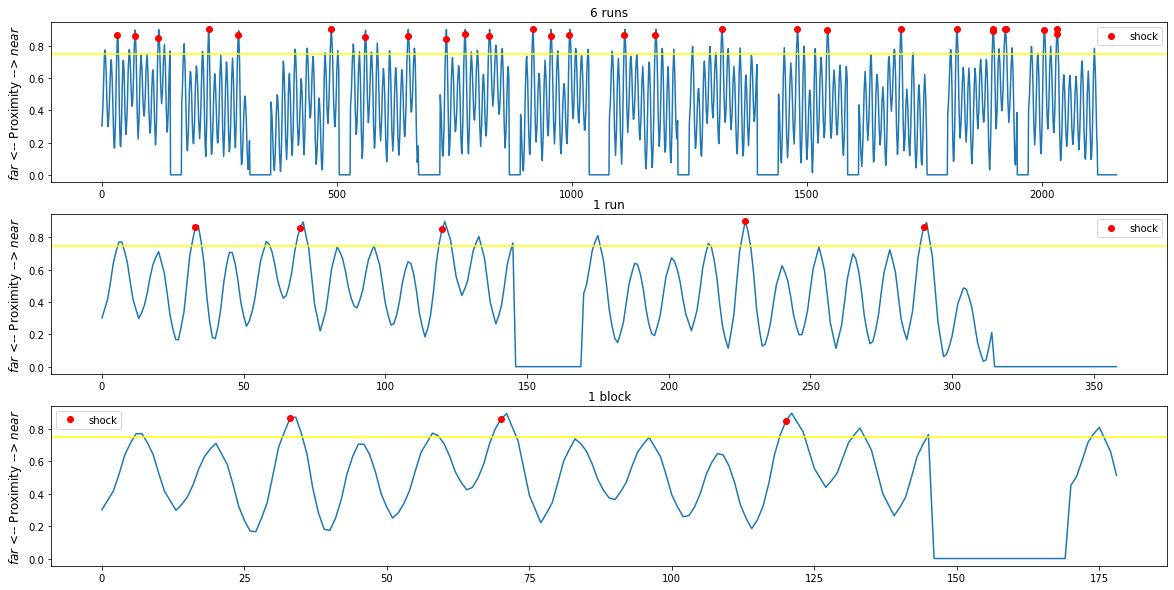

In [56]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(proximity)
plt.ylabel('${far}$ <-- Proximity --> $near$',fontsize=12)
plt.plot(proximity[shock == 1],color='red',marker='o',linestyle = 'None',label='shock')
#plt.axhline(y=0.9,c='red',label='touch')
plt.axhline(y=0.75,c='yellow')
plt.title('6 runs')
plt.legend()

start_idx = 0
end_idx = 359
plt.subplot(3,1,2)
plt.plot(proximity[start_idx:end_idx])
plt.plot(proximity[start_idx:end_idx][shock[start_idx:end_idx] == 1],color='red',marker='o',linestyle = 'None',label='shock')
plt.ylabel('${far}$ <-- Proximity --> $near$',fontsize=12)
#plt.axhline(y=0.9,c='red',label='touch')
plt.axhline(y=0.75,c='yellow')
plt.title('1 run')
plt.legend()

start_idx = 0
end_idx = 179
plt.subplot(3,1,3)
plt.plot(proximity[start_idx:end_idx])
#plt.plot(near_miss[start_idx:end_idx],color='k')
plt.plot(proximity[start_idx:end_idx][shock[start_idx:end_idx] == 1],color='red',marker='o',linestyle = 'None',label='shock')
plt.ylabel('${far}$ <-- Proximity --> $near$',fontsize=12)
#plt.axhline(y=0.9,c='red',label='touch')
plt.axhline(y=0.75,c='yellow')
plt.title('1 block')
plt.legend()

In [27]:
len(np.split(proximity,6)[0])

360

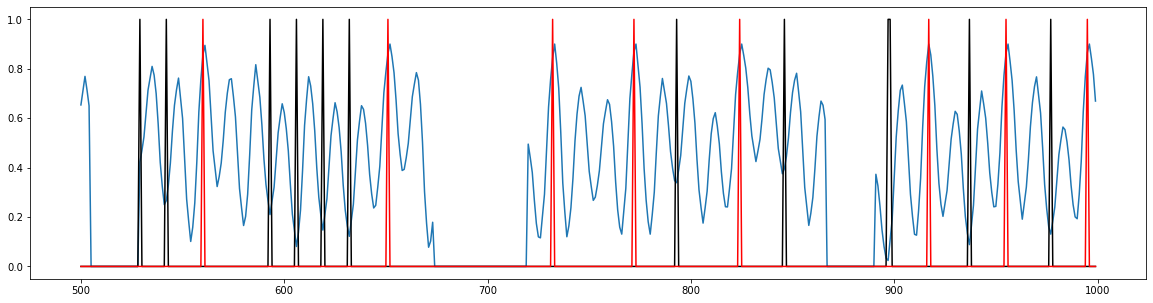

In [7]:
plt.figure(figsize=(20,5))
plt.plot(proximity[500:1000])
plt.plot(near_miss[500:1000],color='k')
plt.plot(shock[500:1000],color='red')

## Count near misses per subjects

In [8]:
yoked = pd.read_excel('/data/bswift-1/Pessoa_Lab/eCON/onsetdir/CON_yoked_table.xlsx')
yoked = yoked.query('use == 1').reset_index()

In [31]:
import itertools

def num_of_events(filepath):
    with open(filepath,'r') as f:
        return len(list(itertools.chain(*[[float(onset) for onset in run.split(' ') if onset != ''] for run in f.readlines() if run !='*\n'])))

In [56]:
df = pd.DataFrame()
for ii, row in yoked.iterrows():
    subj = row['control']
    near_misses = num_of_events('/data/bswift-1/Pessoa_Lab/eCON/dataset/preproc2/{subj}/splitted_regs_fancy/{subj}_near_misses.txt'.format(subj=subj))
    shocks = num_of_events('/data/bswift-1/Pessoa_Lab/eCON/dataset/preproc2/{subj}/regs_fancy/{subj}_shock_onsets.1D'.format(subj=subj))
    df = pd.concat([df,pd.DataFrame([subj,near_misses,shocks,row.loc['run0':'run5'].sum()],
                                    index=["Subj","near_misses","shocks","num_of_runs"]).T],
                   axis=0,
                   ignore_index=True)

In [58]:
df['near_misses_per_run'] = df['near_misses'].divide(df['num_of_runs'])
df['shocks_per_run'] = df['shocks'].divide(df['num_of_runs'])

<AxesSubplot:>

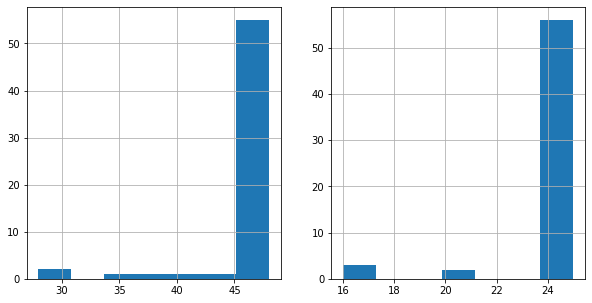

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df.near_misses.hist(bins=int(np.sqrt(len(df))))
plt.subplot(1,2,2)
df.shocks.hist(bins=int(np.sqrt(len(df))))

Text(0.5, 0, 'Avg. number of shocks per run')

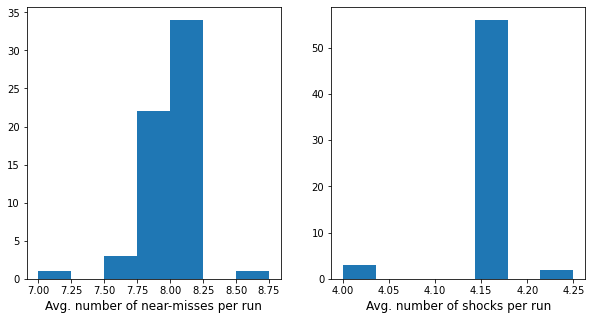

In [72]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df.near_misses_per_run,bins=int(np.sqrt(len(df))))
plt.xlabel('Avg. number of near-misses per run',fontsize=12)
plt.subplot(1,2,2)
plt.hist(df.shocks_per_run,bins=int(np.sqrt(len(df))))
plt.xlabel('Avg. number of shocks per run',fontsize=12)

In [34]:
print(df.loc[df["near_misses"] == 48].shape)
print(df.loc[df["near_misses"] == 47].shape)
print(df.loc[df["near_misses"] == 46].shape)
print(df.loc[df["near_misses"] == 45].shape)
print(df.loc[df["near_misses"] == 41].shape)
print(df.loc[df["near_misses"] == 39].shape)
print(df.loc[df["near_misses"] == 35].shape)
print(df.loc[df["near_misses"] == 30].shape)
print(df.loc[df["near_misses"] == 28].shape)

(33, 3)
(21, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)
(1, 3)


<AxesSubplot:>

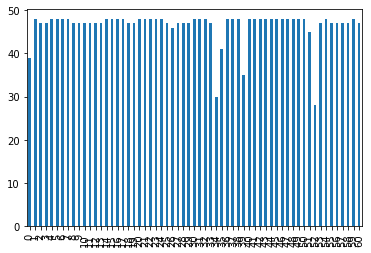

In [35]:
df.near_misses.plot(kind='bar')

In [62]:
print('Max near-misses: ',df.near_misses.max())
print('Max shocks: ',df.shocks.max())

Max near-misses:  48
Max shocks:  25


In [65]:
print('Max near-misses per run: ',df['near_misses_per_run'].mean())
print('Max shocks per run: ',df['shocks_per_run'].mean())

Max near-misses per run:  7.916666666666664
Max shocks per run:  4.161202185792346
